## 🎬  **Project Title** : 

**Box Office Gold**: **Data-Driven Insights for a Profitable Movie Studio Launch**

### **Business Understanding**

#### 👥 Stakeholder
The primary stakeholder is the executive team of the company's new movie studio. They need insights into the film industry to make confident decisions on what type of movies to produce.

🌍 **Domain**:

**Entertainment & Media Analytics (specifically, Film Industry/Box Office Performance)**

📘 **Introduction**:

With the growing trend of major companies venturing into original film production, my organization is planning to launch its own movie studio. However, without prior experience in the film industry, there’s uncertainty about what types of movies resonate with audiences and drive box office success. This project aims to analyze trends in box office data to uncover what genres, budgets, and other film attributes contribute most to commercial success — providing strategic guidance for profitable content creation.

#### 🎯 **Business Objectives** :

1. **To Identify High-Performing Film Genres**:

* Analyze box office data to determine which movie genres consistently generate the highest revenue and audience engagement.

2. **To Examine the Relationship Between Budget and Profitability**:

* Investigate how production budgets influence box office success and identify the budget range that maximizes return on investment (ROI).

3. **To Assess the Impact of Key Film Attributes**:

* Explore how factors such as runtime, cast, release date (season), and film ratings (e.g., PG-13, R) affect a movie’s performance.

4. **To Benchmark Against Top Studios** :

* Analyze which production studios are leading in terms of commercial success and identify patterns in their film portfolios.

5. **To Provide Actionable Recommendations**:

Based on the insights, suggest the optimal type of film (genre, budget, release timing, etc.) that the company should produce for a successful studio launch.

#### 📊 **Project Plan**: **Box Office Gold – Data-Driven Insights for a Profitable Movie Studio Launch**

🔍 **1. Problem Understanding & Goal Definition**

* Review business problem: Identify film types that succeed at the box office.

* Define clear goals: Provide recommendations on genre, budget, and release strategy.


📦 **2. Data Collection**

**Source Box Office Datasets from platforms like**:

* Im.db.zip(movie_basics & Movie_ratings)

* bom.movie_gross.gz

**Collect relevant data fields**:

Genre, budget, revenue, runtime, release date, production company, director, cast, rating, etc.


🧹 **3. Data Cleaning & Preprocessing**

* Handle missing values and inconsistencies.
* Standardize formats (dates, currencies, genres).
* Convert categorical variables where necessary.
* Remove duplicates or irrelevant records (e.g., short films, non-theatrical releases).

📊 **4. Exploratory Data Analysis (EDA)**

* Univariate & Bivariate Analysis (e.g., budget vs revenue, genre vs revenue).
* Correlation heatmaps, box plots, histograms.
* Identify outliers and common patterns in successful films.
* Segment data by genre, production studio, or release year.

🧠 **5. Insights & Recommendations**

* Summarize which genres are top performers.
* Recommend ideal budget ranges.
* Identify optimal release months/seasons.
* Suggest attributes linked to successful movies (e.g., popular runtimes, ratings).

📑 **6. Reporting & Visualization**

* Build clear and compelling visualizations (using Tableau, Power BI, or Python’s Seaborn/Matplotlib).
* Draft a business-focused report or slide deck.

**Include:**

* Key findings
* Strategic suggestions
* Visual evidence

📢 **7. Presentation to Stakeholders**

* Communicate insights in non-technical language.
* Show data-driven rationale for proposed movie types.
* Allow room for stakeholder feedback and Q&A.









### **Overview/Background**

As the entertainment industry shifts toward original content production, many large companies are investing in their own movie studios to capture audience attention and drive revenue. The company seeks to follow this trend but lacks experience in film production. To ensure a successful studio launch, this project aims to analyze historical box office data to uncover key trends in genre performance, budget impact, and other critical success factors. The goal is to provide data-driven insights that will guide strategic decisions on what types of films to produce for maximum box office success.


### **Challenges**

One of the main challenges in this project is acquiring comprehensive and reliable box office data that includes essential attributes such as genre, budget, revenue, and release details. Additionally, the film industry is influenced by unpredictable factors like audience trends, star power, and marketing, which are difficult to quantify. Ensuring data quality, handling missing or inconsistent entries, and drawing actionable insights that align with business goals also present key hurdles in the analysis process.


### **Proposed Solution**

To address the business challenge, this project proposes a data-driven approach that involves collecting and analyzing historical box office data to identify patterns in successful films. By examining factors such as genre, budget, revenue, release timing, and other key attributes, the project will uncover trends that correlate with box office success. The insights will then be translated into practical recommendations to guide the company in producing films with higher chances of commercial success.

### **Conclusion**:

Launching a successful movie studio requires more than creativity—it demands strategic, data-informed decisions. This project leverages box office analytics to uncover what drives film profitability, helping the company make confident choices about genre, budget, and release strategy. With clear insights and recommendations, the company will be well-positioned to enter the competitive film industry with a strong foundation for success.

### ❗ **Problem Statement**

As the company plans to venture into original film production, it faces significant uncertainty due to a lack of industry experience. 🎬 Making informed decisions about what types of films to produce is challenging without a clear understanding of market trends and performance drivers. Additionally, obtaining accurate and complete box office data is difficult, and the film industry itself is influenced by various unpredictable factors such as changing audience preferences, marketing impact, and star power. These challenges make it hard to identify what contributes to a movie’s commercial success and pose a risk to the company’s new venture.


🎯 **Objectives**

- **To analyze historical movie data to identify patterns and trends** related to box office performance.

- **To identify the highest-grossing films and the characteristics that contributed to their success**.

- To determine key factors **such as genre, budget, cast, and runtime** that significantly influence box office revenue.

- To Present insights visually through an interactive dashboard and a clear, non-technical presentation tailored for business stakeholders.

- **To Provide actionable recommendations** to guide the company's new movie studio in selecting and producing high-potential films.

## 📊 **Data Understanding**

The data for this project comes from multiple sources:

1. **im.db.zip**:

**A zipped SQLite database that contains various tables. The two most relevant tables are**:

* **movie_basics**: Likely includes key information about movies such as titles, genres, release dates, runtime, etc.
* **movie_ratings**: Contains viewer and critic ratings, providing insight into movie reception.

2. **bom.movie_gross.csv.gz**:

* A compressed CSV file containing box office gross data. This file is essential for analyzing revenue trends and overall financial performance.
* These sources combined offer a comprehensive view of film attributes and performance metrics, which are crucial for understanding the factors behind movie success.



In cell below I **import Libraries** to use to achieve the project goals

In [2]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In cell below I load and organize data for analysis from `im.db.zip` and `bom.movie_gross.csv.gz` using variable **film_df**. The data is contained in different sources. For the `im.db (after extracting)` I will all tables which I am focusing with in this project `movie_basics` `directors`, `movie_akas`,`movie_ratings`, `persons`, `principals` and
. And for the `bom.movie_gross.csv.gz (compressed file)`

In [3]:
# create connection to im.db

conn = sqlite3.connect('zippedData/im.db/im.db')

# initialize cursor object 
cur = conn.cursor()

#output all tables on im.db
cur.execute("SELECT name from sqlite_master").fetchall()

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

Works better but the execution is long

In [17]:


#query ="""SELECT *
              # JOIN movie_akas USING (movie_id)
               # JOIN movie_basics USING (person_id)
               # JOIN movie_ratings USING (movie_id)
                #JOIN persons USING (person_id)
                
               # ;
#"""

# output query using pandas

#film_df = pd.read_sql(query, conn)
#film_df.head()

In [13]:
# Query im.db to get data from movie_basics.

query = """
SELECT * 
 FROM movie_basics;
"""

# output query using pandas

movie_basics_df = pd.read_sql(query, conn)
movie_basics_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [14]:
# query movie_ratings table

query = """
SELECT *
 FROM movie_ratings;
"""

movie_rating_df = pd.read_sql(query, conn)
movie_rating_df.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [ ]:
# principals table
query = """
SELECT *
 FROM principals;
"""

principals_df = pd.read_sql(query, conn)
principals_df.head()

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"


In [16]:
film_df = pd.merge(movie_basics_df, movie_rating_df, on='movie_id', how='inner')
film_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In cell below I check the shape of `film_df`

In [19]:
# check for shape

film_df.shape

(73856, 8)

In [20]:
principals_df['category'].value_counts()

category
actor                  256718
director               146393
actress                146208
producer               113724
cinematographer         80091
composer                77063
writer                  74357
self                    65424
editor                  55512
production_designer      9373
archive_footage          3307
archive_sound              16
Name: count, dtype: int64

The cell above shows that `film_df` contains **2422866** entries(rows) and **24** attributes.



In [23]:
# meta data summary

film_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [21]:
film_df.isna().sum()

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64



In cell below I load data from `bom.movie_gross.csv.gz` as I need it for the analysis.

In [ ]:
# load data from bom.movie_gross.csv.gz
# box_office_df : shows how movies were earning

box_office_df= pd.read_csv('zippedData/bom.movie_gross.csv.gz')
box_office_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [ ]:
# check box_office_df shape
box_office_df.shape

(3387, 5)

In [14]:
box_office_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [18]:
box_office_df.columns.tolist()

['title', 'studio', 'domestic_gross', 'foreign_gross', 'year']

The cell above shows `box_office_df` as **3387 entries**  and **5 features**. `box_office_df` shows **How much money a movie made** while `film_df` shows **Movies/film data** eg rating, runminutes etc. **Best option is to use the two dataset separate and work with them parallel** 

In [ ]:
movie_budget_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
movie_budget_df.head()

## **Data Cleaning**

- Loaded cleaned data as csv to use for eda from Mohammed(branch).

- Dataset used **(zippedData/cleaned_dataset_box_office.csv)**, **(zippedData/cleaned_dataset_film_df.csv)** & **(zippedData/cleaned_dataset_movie_budget.csv)**



In cell below I load all dataset and organize them ready to use using following variables.

- **box_office_df** - (zippedData/cleaned_dataset_box_office.csv)

- **film_df** - (zippedData/cleaned_dataset_film_df.csv)

- **movie_budget_df** - (zippedData/cleaned_dataset_movie_budget.csv)

In [ ]:
# load 
film_df = pd.read_csv('zippedData/cleaned_dataset_film_df2.csv')
film_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,sunghursh,sunghursh,2013,175.0,"action,crime,drama",7.0,77
1,tt0066787,one day before the rainy season,ashad ka ek din,2019,114.0,"biography,drama",7.2,43
2,tt0069049,the other side of the wind,the other side of the wind,2018,122.0,drama,6.9,4517
3,tt0069204,sabse bada sukh,sabse bada sukh,2018,91.0,"comedy,drama",6.1,13
4,tt0100275,the wandering soap opera,la telenovela errante,2017,80.0,"comedy,drama,fantasy",6.5,119


In [ ]:
# check shape

film_df.shape

(73856, 8)

Cell above shows that `film_df` contains *73856* entries and *8* attributes

In cell below I load `box_office_df` and check for it shape

In [59]:
# load data from bom.movie_gross.csv.gz
# box_office_df : shows how movies were earning

box_office_df= pd.read_csv('zippedData/bom.movie_gross.csv.gz')
box_office_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [60]:
# check box_office_df shape
box_office_df.shape

(3387, 5)

**box_office_df** contains *3387* entries and *5* attributes.

In cell below I load **movie_budget_df** and check for it shape

In [90]:
# load data from tn.movie_budgets.csv.gz
movie_budget_df = pd.read_csv('zippedData/cleaned_dataset_movie_budget.csv')
movie_budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"dec 18, 2009",avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"may 20, 2011",pirates of the caribbean: on stranger tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"jun 7, 2019",dark phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"may 1, 2015",avengers: age of ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"dec 15, 2017",star wars ep. viii: the last jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [63]:
# check for shape

movie_budget_df.shape


(5782, 6)

## **📊 Exploratory Data Analysis**

- Before beginning detailed modeling and recommendations, I will conduct an **Exploratory Data Analysis (EDA)** phase. This phase aims to uncover hidden patterns, trends, and insights that align with the project objectives.

- Based on the objectives, I have crafted the following key **analysis questions** to guide an effective exploration and ensure we achieve the project goal

✨ **General Patterns and Trends (Objective 1)**

- What are the most common genres produced over time?
- How has the average box office revenue changed by year or decade?
- Are newer movies generally earning more revenue than older ones?
- What is the distribution of movie runtimes?
- What is the distribution of movie ratings (viewer scores)?
- How does the number of votes correlate with the box office revenue?
- What is the trend of production volume (number of movies released) year by year?

🎥 **Highest Grossing Films (Objective 2)**

- Which films have grossed the highest revenue domestically and internationally?
- What genres do the top 10 highest-grossing films belong to?
- What is the average budget of the highest-grossing films compared to others?
- What MPAA ratings (e.g., PG-13, R) are most common among top-grossing films?
- Are there specific years or decades that produced more high-grossing films?

🧩 **Key Factors Influencing Revenue (Objective 3)**

- How does **genre** influence box office revenue?
- How does **runtime** correlate with box office success (is there an optimal movie length)?
- How does **budget** size impact box office revenue?
- Does a higher audience rating lead to higher box office earnings?




In [36]:
# create a copy from film_df

film_copy = film_df.copy()
box_office_copy = box_office_df.copy()

In cell below I group data by `year` and `genre` then counts how many movies belong to each genre `each year`. Then finds `top5 most frequent genres` and filter data to keep only top 5 genres. Avoided ploting all genres which would make plot hard to read.

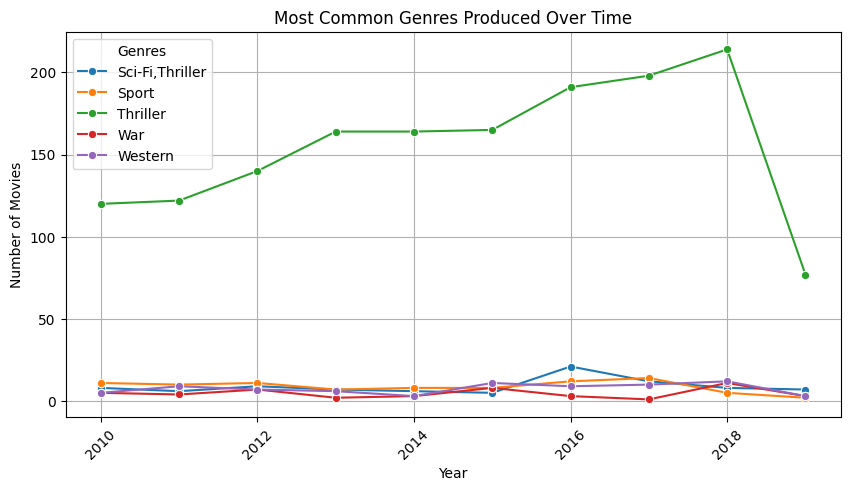

In [34]:

# Group and count
genre_year_counts = film_copy.groupby(['start_year', 'genres']).size().reset_index(name='count')

# Pick top 5 genres
top_genres = genre_year_counts['genres'].value_counts().head(5).index
genre_year_counts = genre_year_counts[genre_year_counts['genres'].isin(top_genres)]

# Line Plot

fig, ax= plt.subplots(figsize=(10,5))
sns.lineplot(data=genre_year_counts, x='start_year', y='count', hue='genres', marker='o')
ax.set_title('Most Common Genres Produced Over Time')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Movies')
ax.tick_params(axis='x', rotation=45)
ax.legend(title='Genres')
plt.grid(True)
plt.show()


### ✅ **Insights**

1. **Thriller** was the most produced genre, peaking in 2018 before dropping sharply in 2019.
2. **Sci-Fi, Thriller** had a major spike in 2016 but didn’t sustain it.
3. **Sport**, **War**, and Western genres stayed low and stable over the years.
4. A slight rise in Western movies was seen in 2012 and 2018 but wasn't maintained.

### 🎯 **Recommendations**

1. **Focus on Thriller**: Since Thriller has consistently high production, it remains a strong genre to invest in.

2. **Niche Opportunities**: Explore ways to grow interest in less popular genres like Sport and Western through innovation or targeted marketing.

4. M**arket Monitoring**: Track shifting audience interests, especially after the 2019 drop, to adjust production strategies.



The Cell below shows **How has the average box office revenue changed by year**. To achieve this I first converted `foreign_gross` to numeric using `pd.to_numeric()`, then **calculate total revenue** and group by year and plot a `lineplot`


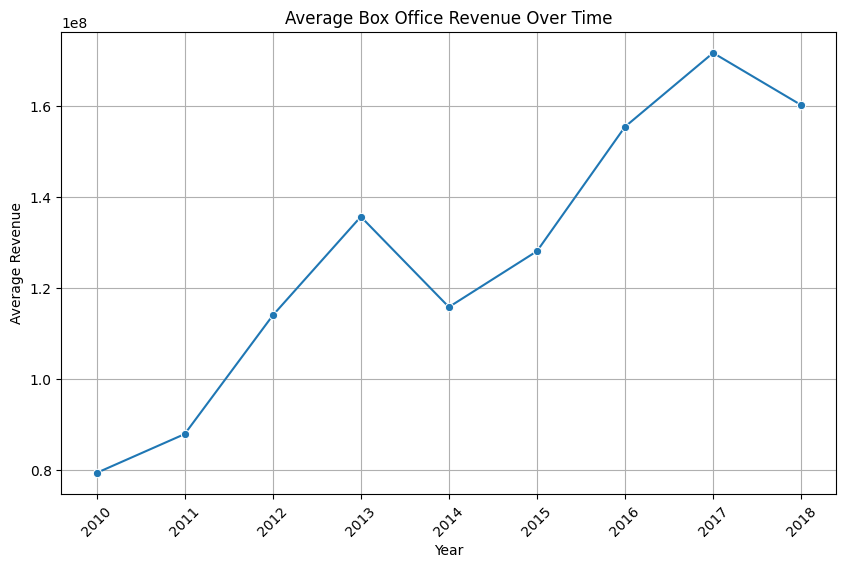

In [44]:
# Convert column to numeric
box_office_copy['foreign_gross'] = pd.to_numeric(box_office_copy['foreign_gross'], errors='coerce')


#  Create a new total revenue column
box_office_copy['total_revenue'] = box_office_copy['domestic_gross'] + box_office_copy['foreign_gross']

# : Group by year and calculate the mean of total_revenue
revenue_avg = box_office_copy.groupby('year')['total_revenue'].mean().reset_index()

# : Plot lineplot
fig, ax = plt.subplots(figsize=(10,6))
sns.lineplot(data=revenue_avg, x='year', y='total_revenue', marker='o')
ax.set_title('Average Box Office Revenue Over Time')
ax.set_xlabel('Year')
ax.set_ylabel('Average Revenue')
ax.tick_params(axis='x' ,rotation=45)
plt.grid(True)
plt.show()



##  ✅ **Insights**

- The **average box office revenue** showed a general **upward trend** from 2010 to 2017.

- The **highest average revenue** was recorded in **2017**.

- There were **two notable drops** in revenue in 2014 and again slightly in 2018.

- Despite occasional declines, the overall pattern indicates **growth in box office earnings** over the years.


### 🎯 **Recommendations**

- **Capitalize on Growth**: Focus on maintaining and boosting box office momentum by investing in high-performing genres and marketing.

- **Investigate Revenue Drops**: Analyze what factors led to the revenue declines in 2014 and 2018 to avoid similar issues in future productions.

- **Leverage Peak Years**: Study successful movies from 2017 to replicate winning strategies (e.g., genre, marketing tactics, release timing).

- **Diversify Offerings**: Ensure a mix of movies to appeal to a broad audience, helping stabilize revenue even if certain trends change.



In cell below the analysis shows **Top 10 Movies by Domestic Gross Revenue** using `barplot`

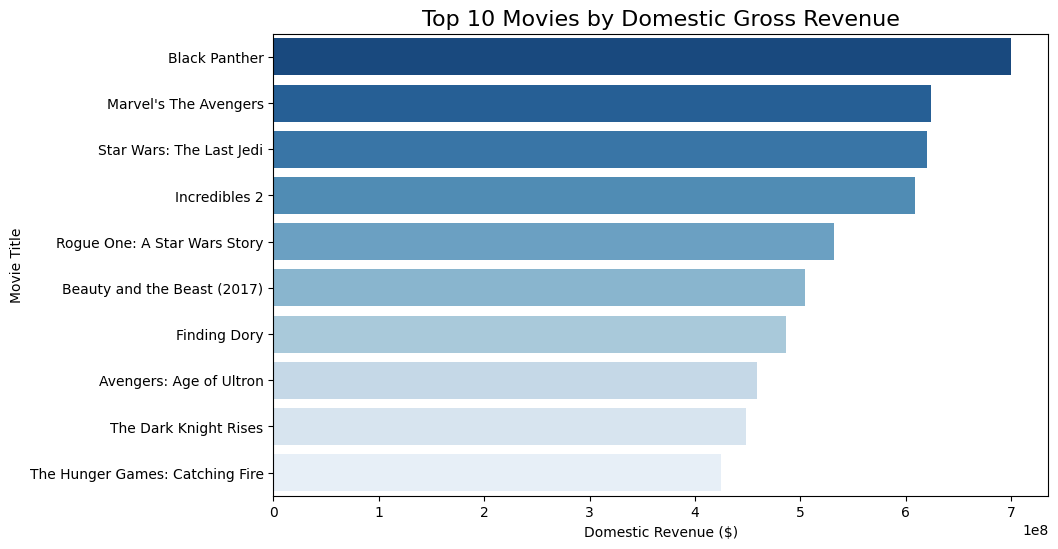

In [81]:

# Sort to find top 10 highest grossing films domestically
top_domestic = box_office_copy.sort_values(by='domestic_gross', ascending=False).head(10)

# Plot 1: Top 10 Domestic Grossing Movies
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=top_domestic, x='domestic_gross', y='title', hue='title', palette='Blues_r')
ax.set_title('Top 10 Movies by Domestic Gross Revenue', fontsize=16)
ax.set_xlabel('Domestic Revenue ($)')
ax.set_ylabel('Movie Title')

plt.show()

### ✅ **Insights**

- **Blockbusters Dominate**: All top movies are major franchise or branded titles (e.g., Marvel, Star Wars, Pixar, Disney).

- **Marvel and Disney Lead**: Marvel and Disney titles appear most frequently, showing strong market influence.

- **Top Earner**: Black Panther leads in domestic gross revenue, reflecting audience preference for superhero movies with cultural resonance.

- **Animated Films Succeed**: Films like Incredibles 2 and Finding Dory show that animated family movies also generate high revenue.

- **Consistency in Themes: Action**, adventure, and fantasy/sci-fi are dominant genres among the top 10.


### 🎯 **Recommendations**

- 🎬 **Invest in Franchises**: Focus future productions and marketing efforts on franchise films and cinematic universes.

- 📈 **Leverage Proven Genres**: Prioritize superhero, fantasy, and animated genres that consistently perform well.

- 🌍 **Promote Diversity**: The success of Black Panther highlights the importance of diverse representation and strong cultural storytelling.

- 👪 T**arget Family Audiences**: Continue to develop high-quality animated and family-friendly content to tap into a broad demographic.

- 📣 **Strategic Marketing**: Follow the example of top-grossing films with early buzz, strong brand identity, and wide release strategies.

In cell below the analysis shows **Top 10 Movies by International Gross Revenue**

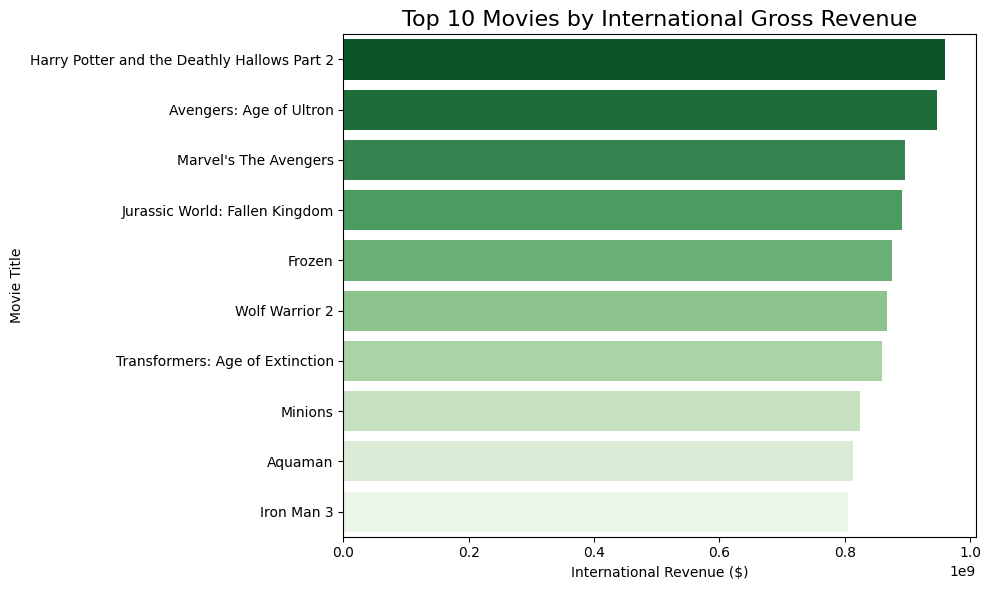

In [ ]:


#  Sort to find top 10 highest grossing films internationally
top_foreign = box_office_copy.sort_values(by='foreign_gross', ascending=False).head(10)


#  Top 10 Foreign Grossing Movies
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=top_foreign, x='foreign_gross', y='title',hue='title', palette='Greens_r')
ax.set_title('Top 10 Movies by International Gross Revenue', fontsize=16)
ax.set_xlabel('International Revenue ($)')
ax.set_ylabel('Movie Title')
plt.show()

### ✅ **Insights**


- 🌍 **Global Appeal Wins**: All top movies are high-budget blockbusters with global recognition and established fan bases.

- 🧙‍♂️ **Harry Potter Tops Internationally**: Harry Potter and the Deathly Hallows Part 2 leads, indicating the strong global loyalty to long-running franchises.

- 💥 **Superheroes Dominate**: Multiple Marvel titles (Avengers, Age of Ultron, Iron Man 3) rank high, proving superhero content translates well globally.

- 🦖 **Action and Fantasy Drive Revenue**: Movies like Jurassic World, Transformers, and Aquaman show that action, fantasy, and sci-fi genres are highly favored internationally.

- ❄️ **Family-Friendly Films Thrive**: Frozen and Minions prove that animated films can be international sensations, especially among family audiences.


### 🎯 **Recommendations**

- 🌐 **Global Distribution Strategy**: Invest in broad international releases, ensuring dubbed/subtitled versions cater to regional markets.

- 📽️ **To Focus on Franchises**: Expand existing cinematic universes (e.g., Marvel, Jurassic) or develop new franchise-capable stories.

- 👨‍👩‍👧‍👦 **To Prioritize Family Content**: Continue investing in animated and family-oriented films to capture multi-generational audiences.

- 📊 **To Tailor for Regional Markets**: Consider region-specific themes, actors, or co-productions to penetrate large markets like China and India.

- 🚀 **To Emphasize Visual Spectacle**: Since visual effects-heavy films succeed globally, allocate budget to VFX and globalized storytelling.